<a href="https://colab.research.google.com/github/Maanya-Joshi/Assignment--EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performing EDA:

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
df=pd.read_csv("/content/iris.data")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.shape

(149, 5)

In [5]:
df.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (3, 5)


In [7]:
df.count() 

5.1            149
3.5            149
1.4            149
0.2            149
Iris-setosa    149
dtype: int64

In [8]:
df = df.drop_duplicates()
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
df.count()

5.1            146
3.5            146
1.4            146
0.2            146
Iris-setosa    146
dtype: int64

In [10]:
df.nunique()

5.1            35
3.5            23
1.4            43
0.2            22
Iris-setosa     3
dtype: int64

In [11]:
df.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [12]:
iris= df.drop(['Iris-setosa'],axis=1)
iris.head()

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


<Axes: xlabel='5.1'>

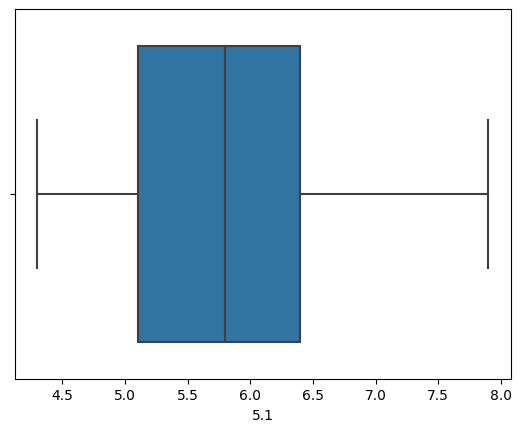

In [13]:
sns.boxplot(x=iris['5.1'])

<Axes: xlabel='3.5'>

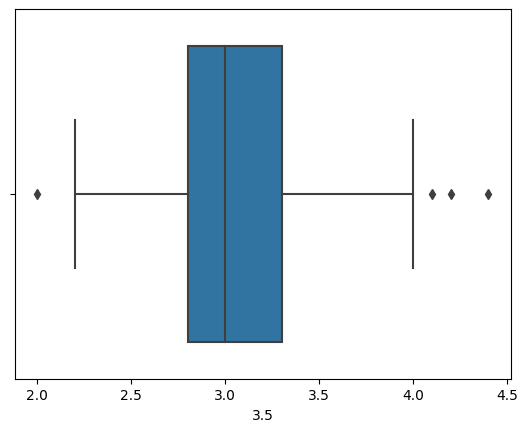

In [14]:
sns.boxplot(x=iris['3.5'])

In [15]:
q1= iris['3.5'].quantile(0.25)
q3= iris['3.5'].quantile(0.75)
iqr= q3-q1
q1,q3,iqr

(2.8, 3.3, 0.5)

In [16]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
upper_limit, lower_limit

(4.05, 2.05)

In [17]:
iris.loc[(iris['3.5']>upper_limit) | (iris['3.5'] < lower_limit) ]

,5.1,3.5,1.4,0.2
14,5.7,4.4,1.5,0.4
31,5.2,4.1,1.5,0.1
32,5.5,4.2,1.4,0.2
59,5.0,2.0,3.5,1.0


In [18]:
new_df = iris.loc[(df['3.5']<upper_limit) & (iris['3.5'] > lower_limit) ]
print("before removing outliers: " ,len(iris))
print("after removing outliers: " ,len(new_df))
print("outliers: " ,len(iris)-len(new_df))

before removing outliers:  146
after removing outliers:  142
outliers:  4


<Axes: xlabel='3.5'>

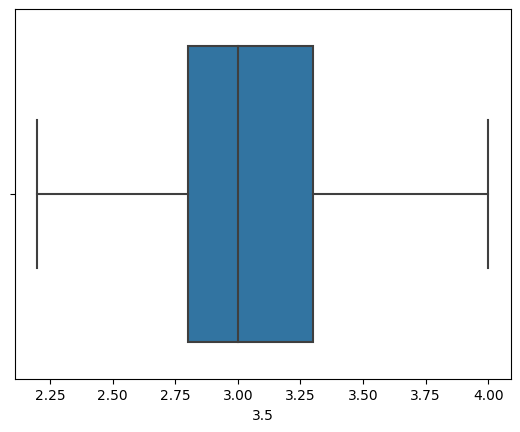

In [19]:
sns.boxplot(x=new_df['3.5'])

<Axes: xlabel='1.4'>

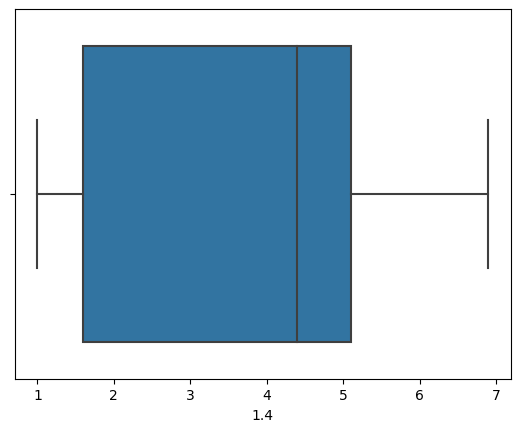

In [20]:
sns.boxplot(x=iris['1.4'])

<Axes: xlabel='0.2'>

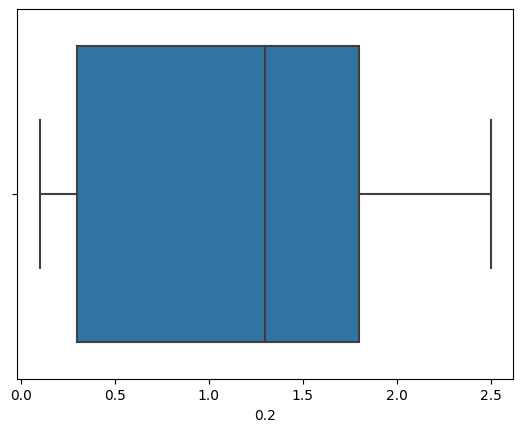

In [21]:
sns.boxplot(x=iris['0.2'])

<Axes: xlabel='3.5', ylabel='Count'>

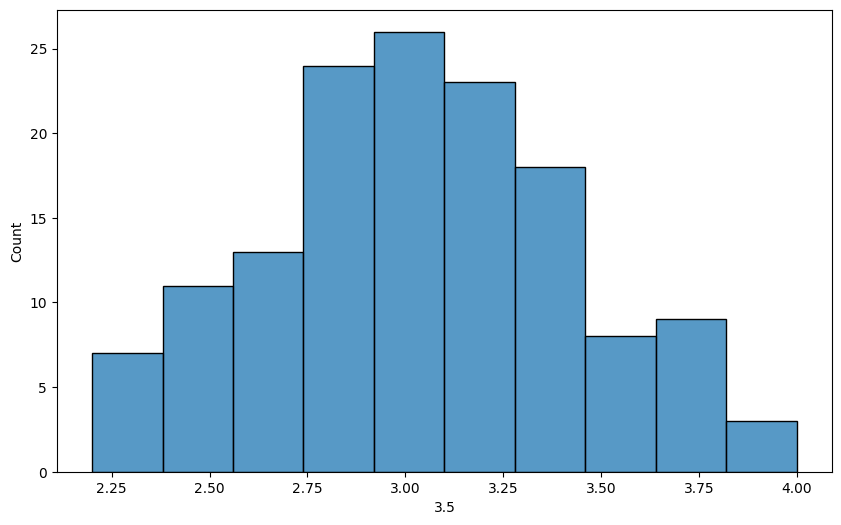

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(new_df['3.5'])

<Axes: xlabel='5.1', ylabel='1.4'>

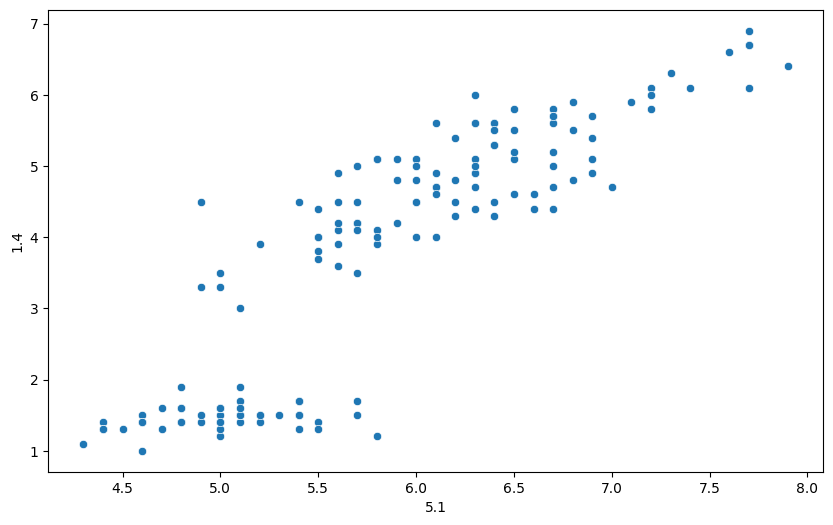

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=iris['5.1'], y=iris['1.4'])

<Axes: xlabel='5.1', ylabel='1.4'>

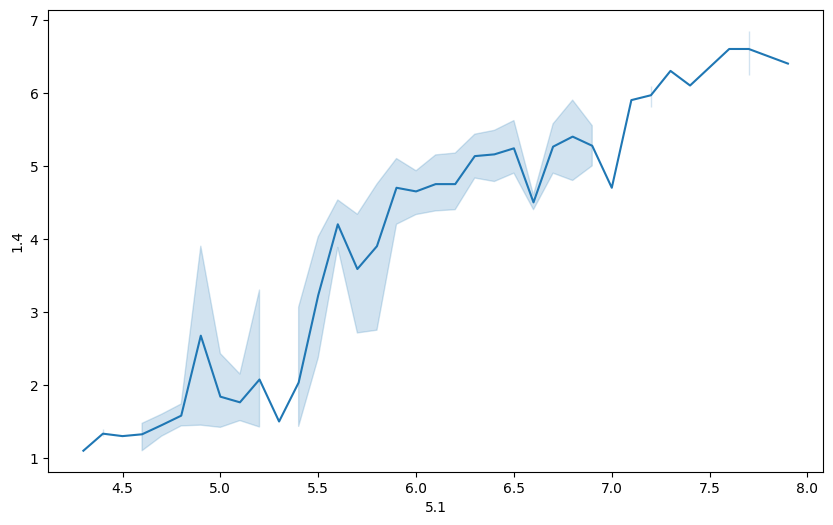

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(x=iris['5.1'], y=iris['1.4'])

<Axes: >

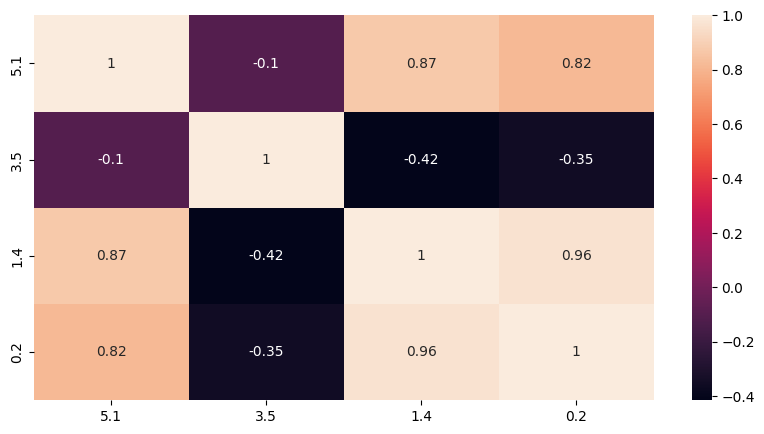

In [32]:
plt.figure(figsize=(10,5))
c= iris.corr()
sns.heatmap(c,annot=True)